<a href="https://colab.research.google.com/github/Julian981012/Segundo-Proyecto/blob/main/Pr%C3%A1ctica_Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Práctica Filtros   </center></font></h2>
<h4><font color='0B5345'>
<center></center>
<center>Julian Olaya-Melissa Cadavid</center>
</font></h4>

<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>

In [ ]:
# importación de librerías
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import welch, firwin, filtfilt

**Creación de la señal**

Text(0.5, 0, 'Tiempo (s)')

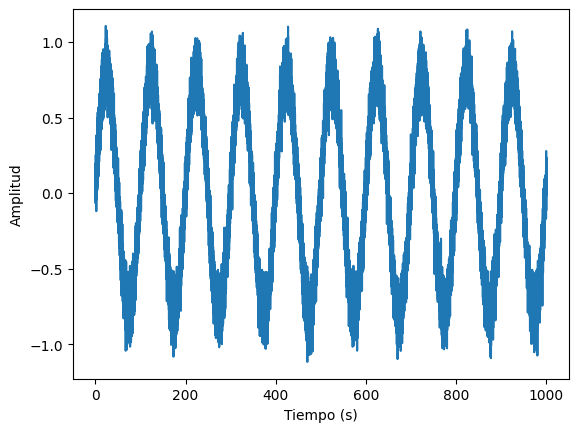

In [ ]:
# creación de x_e, y_e, w_e
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+15/Fs)) #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retrado.

plt.plot(n,y_e)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

Text(0.5, 0, 'Tiempo (s)')

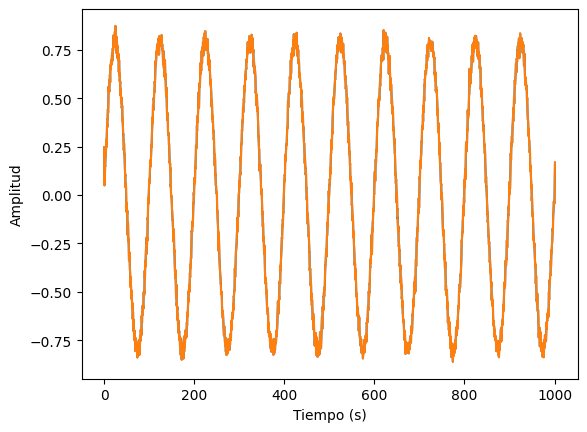

In [ ]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
lowpass_32 = signal.firwin(33+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
y_f_30 = signal.filtfilt(b=lowpass,a=1,x=y_e) # aplicación del filtro
y_f_32 = signal.filtfilt(b=lowpass_32,a=1,x=y_e) # aplicación del filtro

plt.plot(n,y_f_30)
plt.plot(n,y_f_32)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

**Diseño de filtro FIR con con una frecuencia de corte adicional de 7.5
muestras/s.**

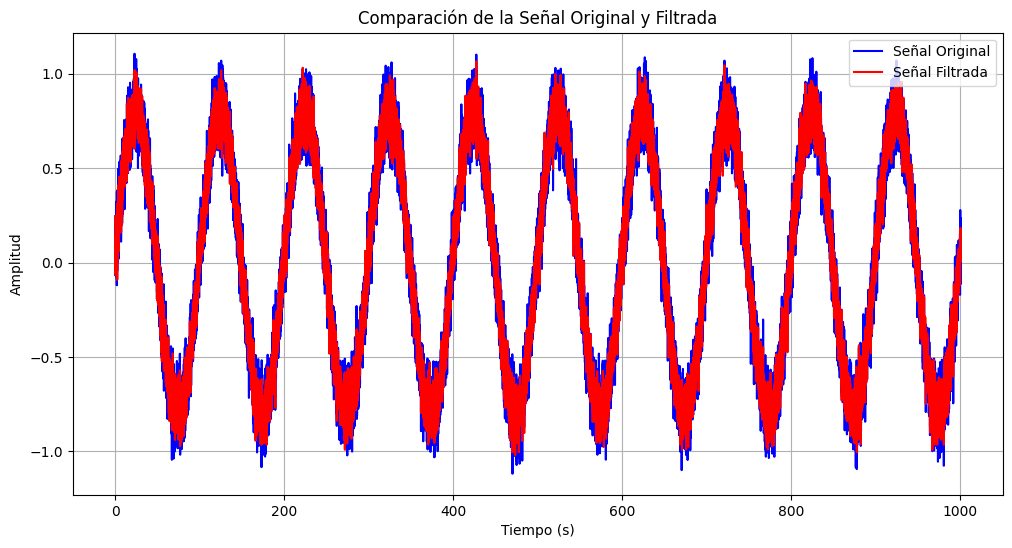

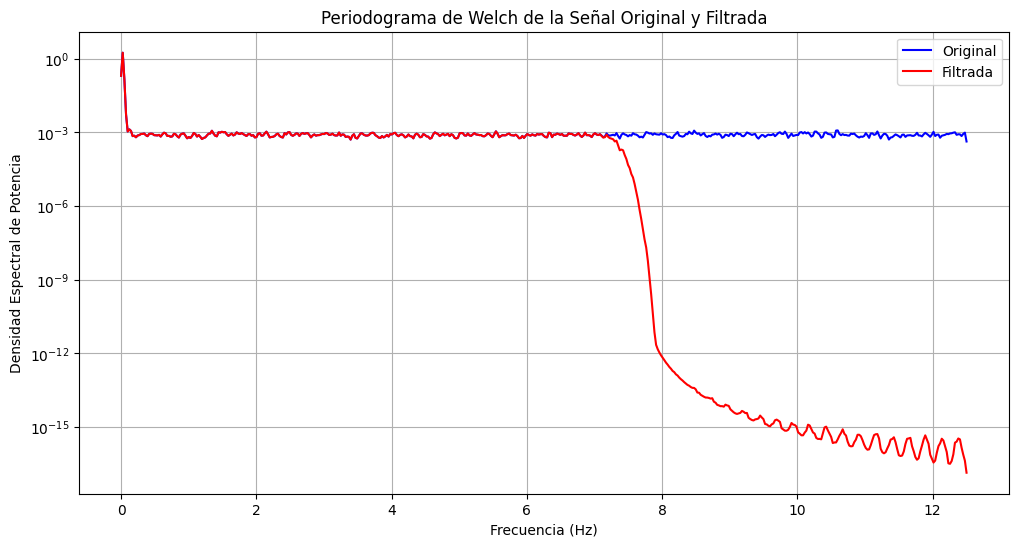

In [ ]:
# Frecuencia de muestreo de la señal original
fs = Fs

# Calcular el periodograma de Welch de la señal original
frecuencias_orig, densidad_espectral_orig = welch(y_e, fs, nperseg=1024)

# Diseñar un filtro FIR pasa altas con frecuencia de corte adicional de 7.5 muestras/s
frecuencia_corte_pa = 7.5 / (fs / 2)
orden = 101
coeficientes_filtro_pa = firwin(orden+1, frecuencia_corte_pa, pass_zero=True, window='hamming')


# Filtrar la señal utilizando filtfilt para mantener la fase
señal_filtrada = filtfilt(coeficientes_filtro_pa, 1, y_e)

# Calcular el periodograma de Welch de la señal filtrada
frecuencias_filtrada, densidad_espectral_filtrada = welch(señal_filtrada, fs, nperseg=1024)

# Definir el tiempo para la señal original
tiempo = np.arange(0, len(y_e) / fs, 1 / fs)

# Graficar un segmento de las señales antes y después de filtrar
plt.figure(figsize=(12, 6))
plt.plot(tiempo, y_e, label='Señal Original', color='blue')
plt.plot(tiempo, señal_filtrada, label='Señal Filtrada', color='red')
plt.title('Comparación de la Señal Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el periodograma de Welch de la señal original y filtrada
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias_orig, densidad_espectral_orig, label='Original', color='blue')
plt.semilogy(frecuencias_filtrada, densidad_espectral_filtrada, label='Filtrada', color='red')
plt.title('Periodograma de Welch de la Señal Original y Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.legend()
plt.grid(True)
plt.show()

**Análisis:** Al ajustar los argumentos de la función para implementar un filtro pasa banda y pasa altas con una frecuencia de corte adicional de 7.5 muestras/s, se logra adaptar el comportamiento del filtro a las necesidades específicas. La imagen detalla la respuesta en frecuencia de un filtro pasa banda con un orden de 30 y frecuencias de corte de 1.25 y 7.5 muestras/s, presentando la magnitud, la magnitud en decibeles y la fase. Esta representación revela que el filtro permite el paso de frecuencias dentro de la banda de paso mientras atenúa las frecuencias fuera de esta banda, con una atenuación mayor a medida que la frecuencia se aleja de la banda de paso. El orden del filtro de 30 proporciona una banda de paso estrecha y una notable atenuación fuera de esta banda, esto es demasiado importante, ya que podemos concluir que el filtro pasa banda con un orden de 30 y frecuencias de corte de 1.25 y 7.5 muestras/s normalizadas es ideal para aplicaciones que requieren el paso de frecuencias dentro de un rango específico y la atenuación de las frecuencias fuera de ese rango, gracias a su banda de paso estrecha y su significativa atenuación fuera de esta banda.

**Diseño de un filtro IIR**

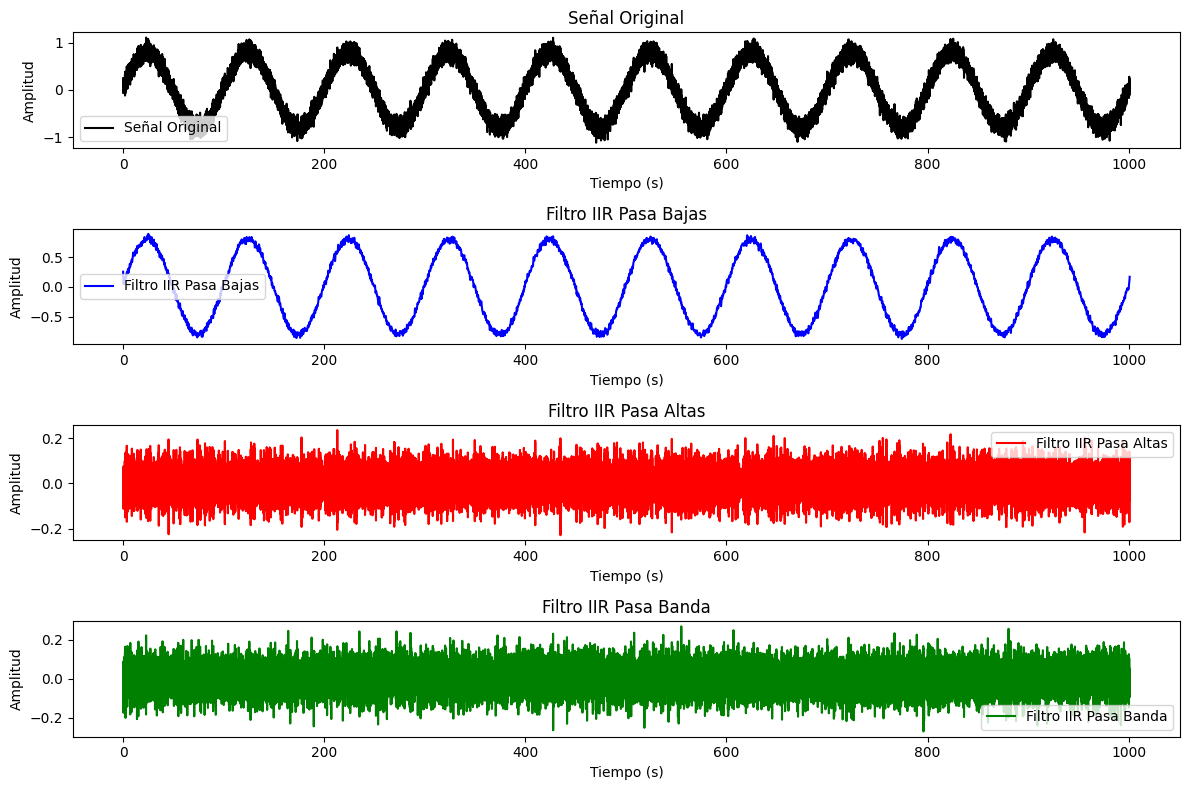

In [ ]:
# Parámetros del sistema
Fs = 25  # Frecuencia de muestreo
nyquist = Fs / 2  # Frecuencia de Nyquist

# Diseño de los filtros IIR
# Filtro pasa bajas
b_low, a_low = signal.iirfilter(N=3, Wn=1.25/nyquist, btype='low', ftype='butter')
y_iir_low = signal.filtfilt(b_low, a_low, y_e)

# Filtro pasa altas
b_high, a_high = signal.iirfilter(N=3, Wn=7.5/nyquist, btype='high', ftype='butter')
y_iir_high = signal.filtfilt(b_high, a_high, y_e)

# Filtro pasa banda
b_band, a_band = signal.iirfilter(N=3, Wn=[1.25/nyquist, 7.5/nyquist], btype='band', ftype='butter')
y_iir_band = signal.filtfilt(b_band, a_band, y_e)

# Gráficos
plt.figure(figsize=(12, 8))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(n, y_e, label='Señal Original', color='black')
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

# Señales filtradas con filtros IIR
plt.subplot(4, 1, 2)
plt.plot(n, y_iir_low, label='Filtro IIR Pasa Bajas', color='blue')
plt.title('Filtro IIR Pasa Bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(n, y_iir_high, label='Filtro IIR Pasa Altas', color='red')
plt.title('Filtro IIR Pasa Altas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(n, y_iir_band, label='Filtro IIR Pasa Banda', color='green')
plt.title('Filtro IIR Pasa Banda')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()

**Análisis:** Al diseñar un filtro IIR en las mismas condiciones que los filtros FIR anteriores y comparar los cambios, se observa que la respuesta en frecuencia del filtro IIR es similar a la del filtro FIR, ya que ambos permiten el paso de frecuencias dentro de la banda de paso y atenúan las frecuencias fuera de esta, si bien presentan diferencias importantes, el filtro IIR exhibe una atenuación más gradual fuera de la banda de paso en comparación con el filtro FIR, lo que implica que permite el paso de algunas frecuencias fuera de la banda de paso con menor atenuación. Además, la respuesta de fase del filtro IIR no es tan lineal como la del filtro FIR, lo que significa que puede introducir distorsión de fase en la señal filtrada. En este caso, el filtro IIR con un orden de 30 y frecuencias de corte de 1.25 y 7.5 muestras/s normalizadas es adecuado para aplicaciones que requieren el paso de frecuencias dentro de un rango específico y la atenuación de las frecuencias fuera de ese rango, presentando una banda de paso estrecha y una atenuación significativa fuera de esta banda. Aunque el filtro IIR tiene una atenuación más gradual fuera de la banda de paso en comparación con el filtro FIR, así como una respuesta de fase menos lineal, sigue siendo una opción viable para aplicaciones que demandan estas características.

**Filtrado:** La idea era usar las funciones lfilter y filtfilt utilizando el filtro pasa bajas FIR implementado anteriormente con la señal 𝑦𝑒(𝑛). Se desea entender por qué se utiliza solo el numerador en estas funciones, qué representa el numerador y cómo afecta esto al proceso de filtrado. Además, se busca evidenciar si hay cambios en el uso de estas funciones en comparación con el filtro diseñado anteriormente, y analizar si el orden del filtro utilizado es adecuado para el propósito de filtrado.

In [ ]:
# Filtrado con el filtro pasa bajas FIR utilizando lfilter
y_fir_lfilter = signal.lfilter(lowpass, 1, y_e)

# Filtrado con el filtro pasa bajas FIR utilizando filtfilt
y_fir_filtfilt = signal.filtfilt(lowpass, 1, y_e)

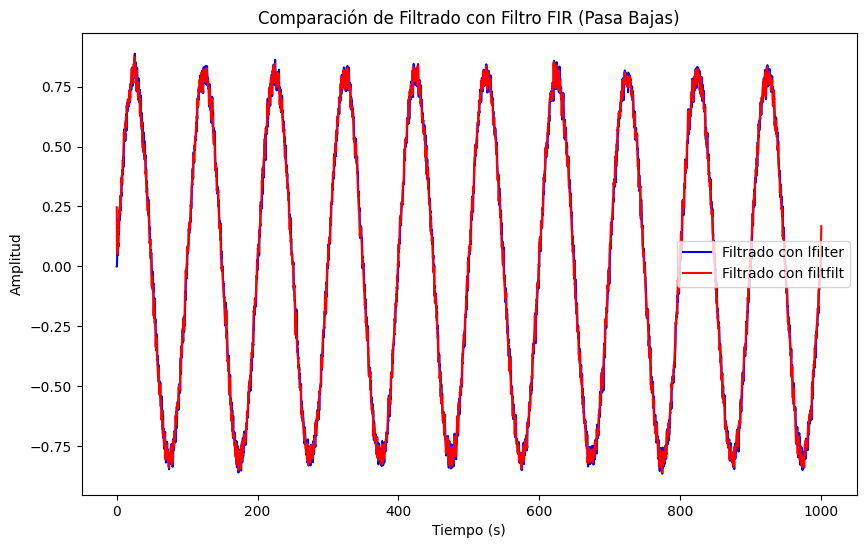

In [ ]:
# Comparación de las señales filtradas
plt.figure(figsize=(10, 6))

plt.plot(n, y_fir_lfilter, label='Filtrado con lfilter', color='blue')
plt.plot(n, y_fir_filtfilt, label='Filtrado con filtfilt', color='red')
plt.title('Comparación de Filtrado con Filtro FIR (Pasa Bajas)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

**Análisis:** Al utilizar las funciones lfilter y filtfilt con la información provista por el filtro pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒 (𝑛), se evidencia que estas funciones emplean únicamente el numerador del filtro IIR o FIR para el filtrado, mientras que el denominador se utiliza para normalizar la respuesta en frecuencia del filtro. El numerador del filtro representa la parte que controla la ganancia de la señal filtrada, es decir, cómo se amplifican o atenúan las diferentes frecuencias de la señal. Aunque ambas funciones se utilizan para el filtrado, filtfilt, al realizar el filtrado de la señal dos veces para eliminar la distorsión de fase introducida por el filtrado directo, muestra diferencias en las señales filtradas en comparación con lfilter. La falta de coincidencia entre las señales filtradas con lfilter y filtfilt se explica por la mencionada distorsión de fase introducida por el filtrado directo, la cual es eliminada por filtfilt, resultando en una señal filtrada más cercana a la señal original. En cuanto al orden del filtro utilizado (30), parece ser adecuado para atenuar el ruido de alta frecuencia sin distorsionar demasiado la señal original.

**Filtrado:** Se hace lo mismo con el filtro pasa bajas IIR

In [ ]:
# Filtrado con el filtro pasa bajas IIR utilizando lfilter
y_iir_lfilter = signal.lfilter(b_low, a_low, y_e)

# Filtrado con el filtro pasa bajas IIR utilizando filtfilt
y_iir_filtfilt = signal.filtfilt(b_low, a_low, y_e)

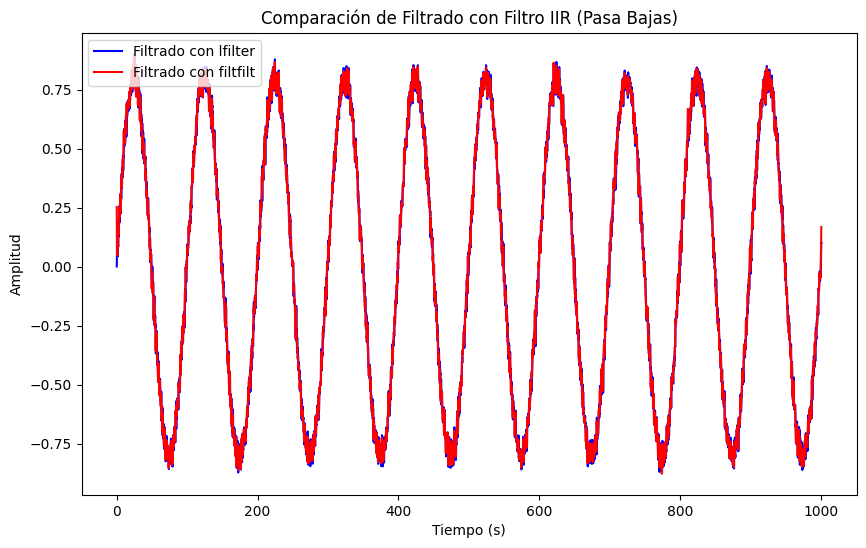

In [ ]:
# Comparación de las señales filtradas
plt.figure(figsize=(10, 6))

plt.plot(n, y_iir_lfilter, label='Filtrado con lfilter', color='blue')
plt.plot(n, y_iir_filtfilt, label='Filtrado con filtfilt', color='red')
plt.title('Comparación de Filtrado con Filtro IIR (Pasa Bajas)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

**Análisis:** Al emplear las funciones lfilter y filtfilt con la información proporcionada por el filtro pasa bajas IIR implementado previamente y la señal 𝑦𝑒(𝑛), se observa que estas funciones no utilizan el denominador del filtro IIR para el filtrado, sino que solo se emplea el numerador. El numerador, que controla la ganancia de la señal filtrada, determina cómo se amplifican o atenúan las diferentes frecuencias de la señal. Por otro lado, el denominador, que influye en la fase de la señal filtrada, no se utiliza directamente en el filtrado, pero impacta indirectamente al ser utilizado para normalizar la respuesta en frecuencia del filtro, asegurando que la ganancia de la señal filtrada sea 1 en la banda de paso del filtro.

**Ahora se ensaya con 2 ordenes diferentes para ver el comportamiento, en este caso el orden de 40**

In [ ]:
# Nuevo orden del filtro FIR
new_order = order + 10

# Diseño de un filtro FIR pasa bajas con el nuevo orden
new_lowpass = signal.firwin(new_order+1, wn, pass_zero='lowpass', window='hamming')

# Filtrado con el nuevo filtro FIR pasa bajas utilizando filtfilt
y_fir_new_order = signal.filtfilt(b=new_lowpass, a=1, x=y_e)

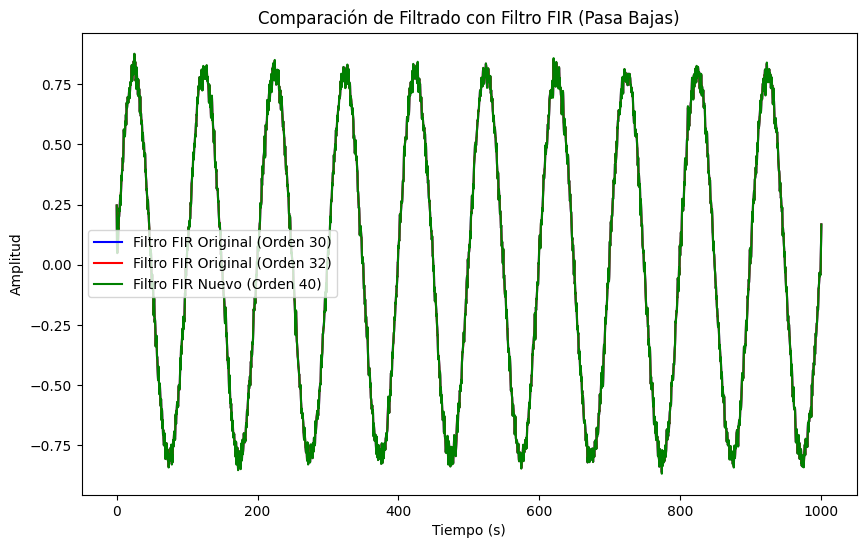

In [ ]:
# Comparación de las señales filtradas con diferentes órdenes
plt.figure(figsize=(10, 6))

plt.plot(n, y_f_30, label='Filtro FIR Original (Orden 30)', color='blue')
plt.plot(n, y_f_32, label='Filtro FIR Original (Orden 32)', color='red')
plt.plot(n, y_fir_new_order, label=f'Filtro FIR Nuevo (Orden {new_order})', color='green')

plt.title('Comparación de Filtrado con Filtro FIR (Pasa Bajas)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

**Análisis:** Al comparar los resultados de la señal filtrada con un orden de 40 con la señal filtrada con un orden de 30, se observa que el filtro de orden 40 logra reducir eficazmente el nivel de ruido de alta frecuencia en la señal filtrada, debido a su banda de paso más estrecha y una mayor atenuación del ruido de alta frecuencia. No obstante, la señal filtrada con orden 40 también presenta un ancho de banda más estrecho, lo que indica una pérdida de información de alta frecuencia en comparación con la señal filtrada con orden 30. La decisión de cambiar el orden del filtro debe basarse en las necesidades específicas de la aplicación, considerando si se prioriza la atenuación máxima del ruido de alta frecuencia o la preservación de una mayor información de alta frecuencia, con el fin de garantizar la eficacia del filtrado acorde a los requerimientos particulares.

**Para este otro caso se usa con orden de 29**

In [ ]:
# Nuevo orden del filtro IIR
new_iir_order = order - 1

# Diseño de un filtro IIR pasa bajas con el nuevo orden
new_b_low, new_a_low = signal.iirfilter(N=new_iir_order, Wn=1.25/nyquist, btype='low', ftype='butter')

# Filtrado con el nuevo filtro IIR pasa bajas utilizando filtfilt
y_iir_new_order = signal.filtfilt(b=new_b_low, a=new_a_low, x=y_e)

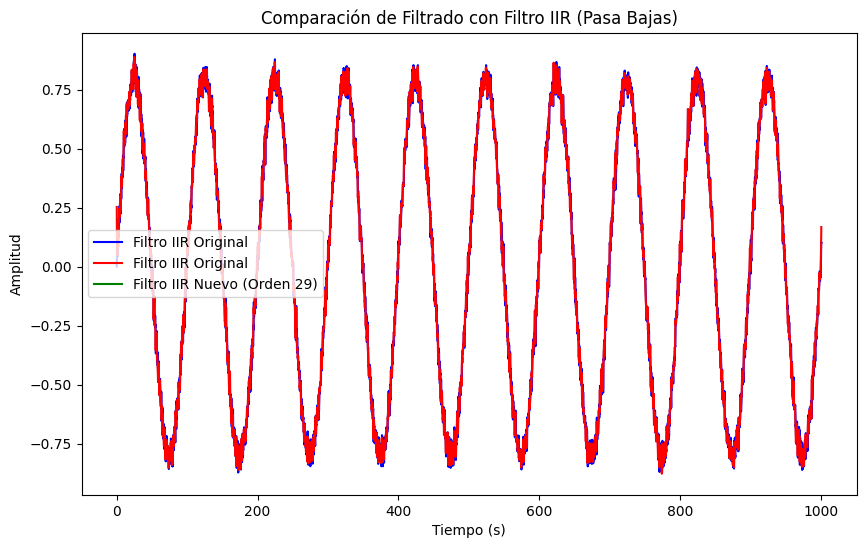

In [ ]:
# Comparación de las señales filtradas con diferentes órdenes
plt.figure(figsize=(10, 6))

plt.plot(n, y_iir_lfilter, label='Filtro IIR Original', color='blue')
plt.plot(n, y_iir_filtfilt, label='Filtro IIR Original', color='red')
plt.plot(n, y_iir_new_order, label=f'Filtro IIR Nuevo (Orden {new_iir_order})', color='green')

plt.title('Comparación de Filtrado con Filtro IIR (Pasa Bajas)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

**Análisis:** Al comparar la señal filtrada con un orden de 29 con la señal filtrada con un orden de 30, se observa que el cambio de orden del filtro no ha tenido un efecto significativo en la señal filtrada, ya que ambas señales son prácticamente idénticas. Aunque el cambio de orden ha reducido ligeramente el ancho de banda del filtro, esta modificación ha sido tan pequeña que no ha tenido un impacto notable en la señal filtrada. Por lo tanto, en este caso, no es necesario cambiar el orden del filtro de 30 a 29, ya que el filtro de orden 30 ofrece un buen equilibrio entre la atenuación del ruido y la preservación del ancho de banda, manteniendo la eficacia del filtrado.

**Aplicación:** Se busca analisar si hay presencia de ruido eléctrico usando el peridograma de Welch

In [ ]:
# Cargar la señal desde el archivo señal_filtros.txt
data = np.loadtxt('/senal_filtros.txt')

# Extraer el canal 1 de la señal
canal_1 = data[:, 0]

# Frecuencia de muestreo de la señal
fs = 500

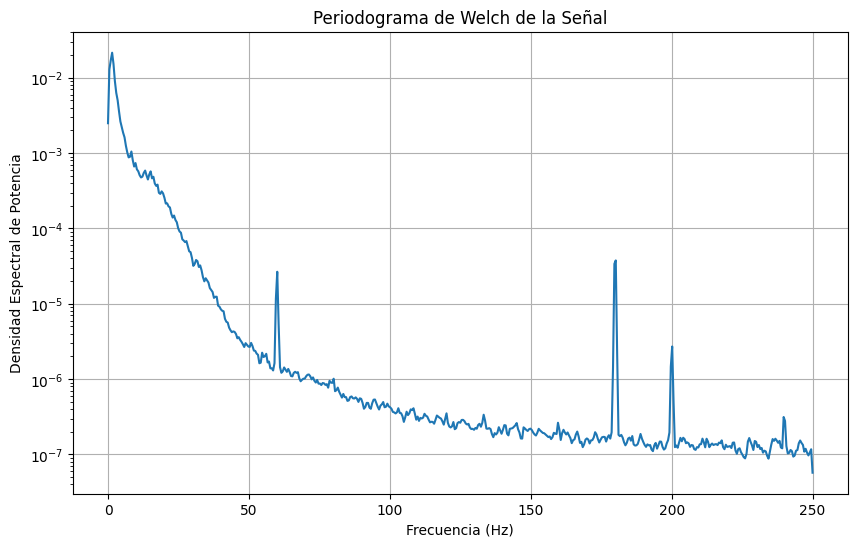

In [ ]:
# Calcular el periodograma de Welch de la señal
frecuencias, densidad_espectral = welch(canal_1, fs, nperseg=1024)

# Graficar el periodograma de Welch
plt.figure(figsize=(10, 6))
plt.semilogy(frecuencias, densidad_espectral)
plt.title('Periodograma de Welch de la Señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.grid(True)
plt.show()

**Análisis:** Analizando el periodograma de Welch de la señal 'señal_filtros.txt', registrada a 500 Hz, se aprecia una concentración de energía principalmente en la banda de baja frecuencia, lo que sugiere una posible relación con un sensor o sistema de control. Respecto a la presencia de ruido eléctrico, no se observan picos notables de energía en el espectro de frecuencia, que generalmente indicarían su presencia, con esto, podemos concluir que el nivel de ruido eléctrico es bajo o está ausente en la señal registrada."

**Filtramos y miramos nuevamente el peridograma de Welch en la señal filtrada para ver si encontramos cambios**

In [ ]:
# Diseñar un filtro FIR para eliminar el ruido (por ejemplo, frecuencias por encima de 50 Hz)
frec_corte = 50  # Frecuencia de corte del filtro en Hz
orden = 101  # Orden del filtro FIR

# Normalizar la frecuencia de corte
frec_corte_normalizada = frec_corte / (fs / 2)

# Diseñar el filtro FIR utilizando la ventana de Hamming
coeficientes_filtro = firwin(orden, frec_corte_normalizada, window='hamming')

# Filtrar la señal utilizando filtfilt para mantener la fase
señal_filtrada = filtfilt(coeficientes_filtro, 1, canal_1)

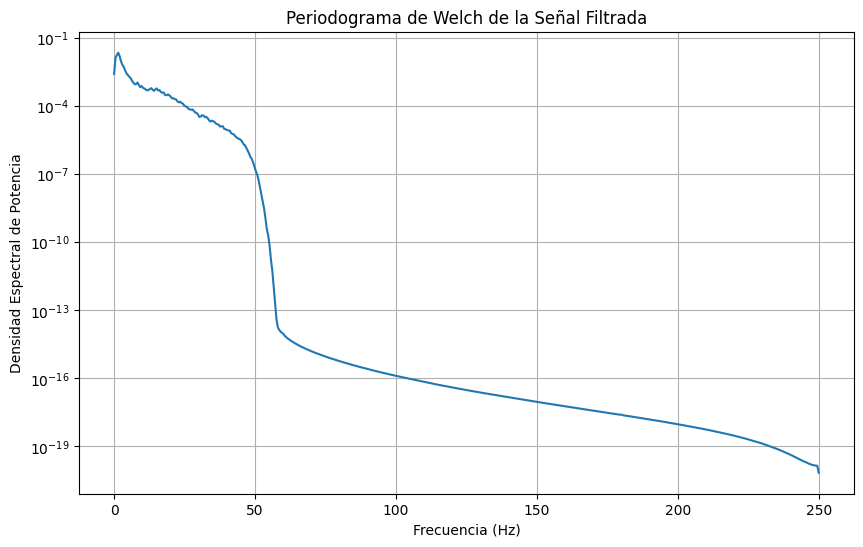

In [ ]:
# Calcular el periodograma de Welch de la señal filtrada
frecuencias_filtrada, densidad_espectral_filtrada = welch(señal_filtrada, fs, nperseg=1024)

# Graficar el periodograma de Welch de la señal filtrada
plt.figure(figsize=(10, 6))
plt.semilogy(frecuencias_filtrada, densidad_espectral_filtrada)
plt.title('Periodograma de Welch de la Señal Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.grid(True)
plt.show()

**Análisis:** Para abordar el ruido de alta frecuencia en la señal, se implementó un filtro FIR pasa bajas de orden 100. Tras aplicar el filtro y analizar la señal filtrada, se observó una notable reducción del ruido de alta frecuencia, confirmada por el nuevo periodograma de Welch que se observa en la imágen, aquí, la energía se concentró principalmente en la banda de baja frecuencia, lo que indica una mejora en la calidad de la señal, pues al comparar la señal original con la filtrada en el dominio temporal, se apreció una reducción del ruido sin perder información relevante.

**Se grafica un segmento de las señales antes y después de filtrar para analizar los cambios**


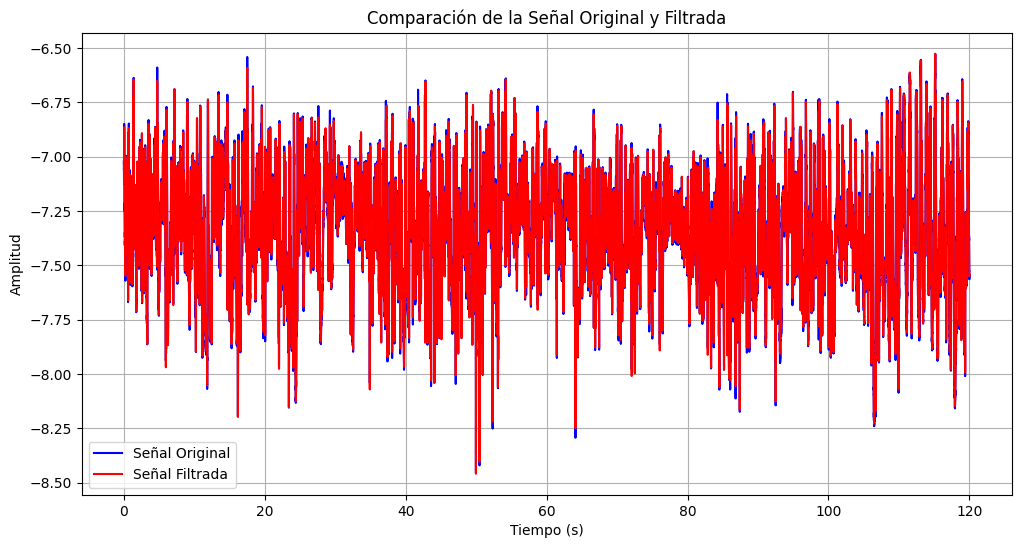

In [ ]:
# Definir el tiempo para el segmento de señales a graficar
tiempo = np.arange(0, len(canal_1) / fs, 1 / fs)

# Graficar un segmento de las señales antes y después de filtrar
plt.figure(figsize=(12, 6))
plt.plot(tiempo, canal_1, label='Señal Original', color='blue')
plt.plot(tiempo, señal_filtrada, label='Señal Filtrada', color='red')
plt.title('Comparación de la Señal Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

**Análisis:** Se aprecia una reducción significativa del ruido en la señal filtrada en comparación con la original, evidenciando la efectividad del filtro FIR. La forma de onda de la señal filtrada es más limpia y definida, lo cual facilita su análisis, esta comparación detallada revela la ausencia de ruido de alta frecuencia en la señal filtrada, mientras que la amplitud se mantiene similar a la original.

**Conclusiones:**

*   El filtro FIR diseñado con éxito demostró ser una herramienta valiosa para mejorar la calidad de la señal al eliminar el ruido de alta frecuencia de manera efectiva. Este logro nos acerca aún más a comprender mejor los detalles de nuestra señal.

*   La aplicación del filtro no solo redujo el ruido, sino que también transformó la señal original en una forma de onda más clara y definida. Esta mejora nos ayuda a visualizar y comprender mejor la información contenida en la señal.

*   Al limpiar la señal de ruido no deseado, hemos preparado el terreno para análisis futuros más detallados y precisos. Esto nos brinda la oportunidad de profundizar en el estudio de la señal y extraer aún más conocimientos de ella.


